In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [2]:
heartdisease_df = pd.read_excel('cleveland.xlsx')
heartdisease_df.info()

heartdisease_df['num'] = np.array([1 if x == "positive" else 0 for x in heartdisease_df['num']])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
age         173 non-null float64
sex         173 non-null float64
cp          173 non-null float64
trestbps    173 non-null float64
chol        173 non-null float64
fbs         173 non-null float64
restecg     173 non-null float64
thalach     173 non-null float64
exang       173 non-null float64
oldpeak     173 non-null float64
slope       173 non-null float64
ca          173 non-null float64
thal        173 non-null float64
num         173 non-null object
dtypes: float64(13), object(1)
memory usage: 19.0+ KB


In [3]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)
# Olcumleyebılmek için cıft sayı yapmıstık kmean da , karsılastırma ıcın bunda da aynı seyı uyguluyorum
X=X.append(X.iloc[172],ignore_index=True,verify_integrity=True)
y[173]=y[172]

C:\Users\Mehtap_Labtop\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [4]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [5]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

In [6]:
clusters = gmm_cluster.fit_predict(X_std)

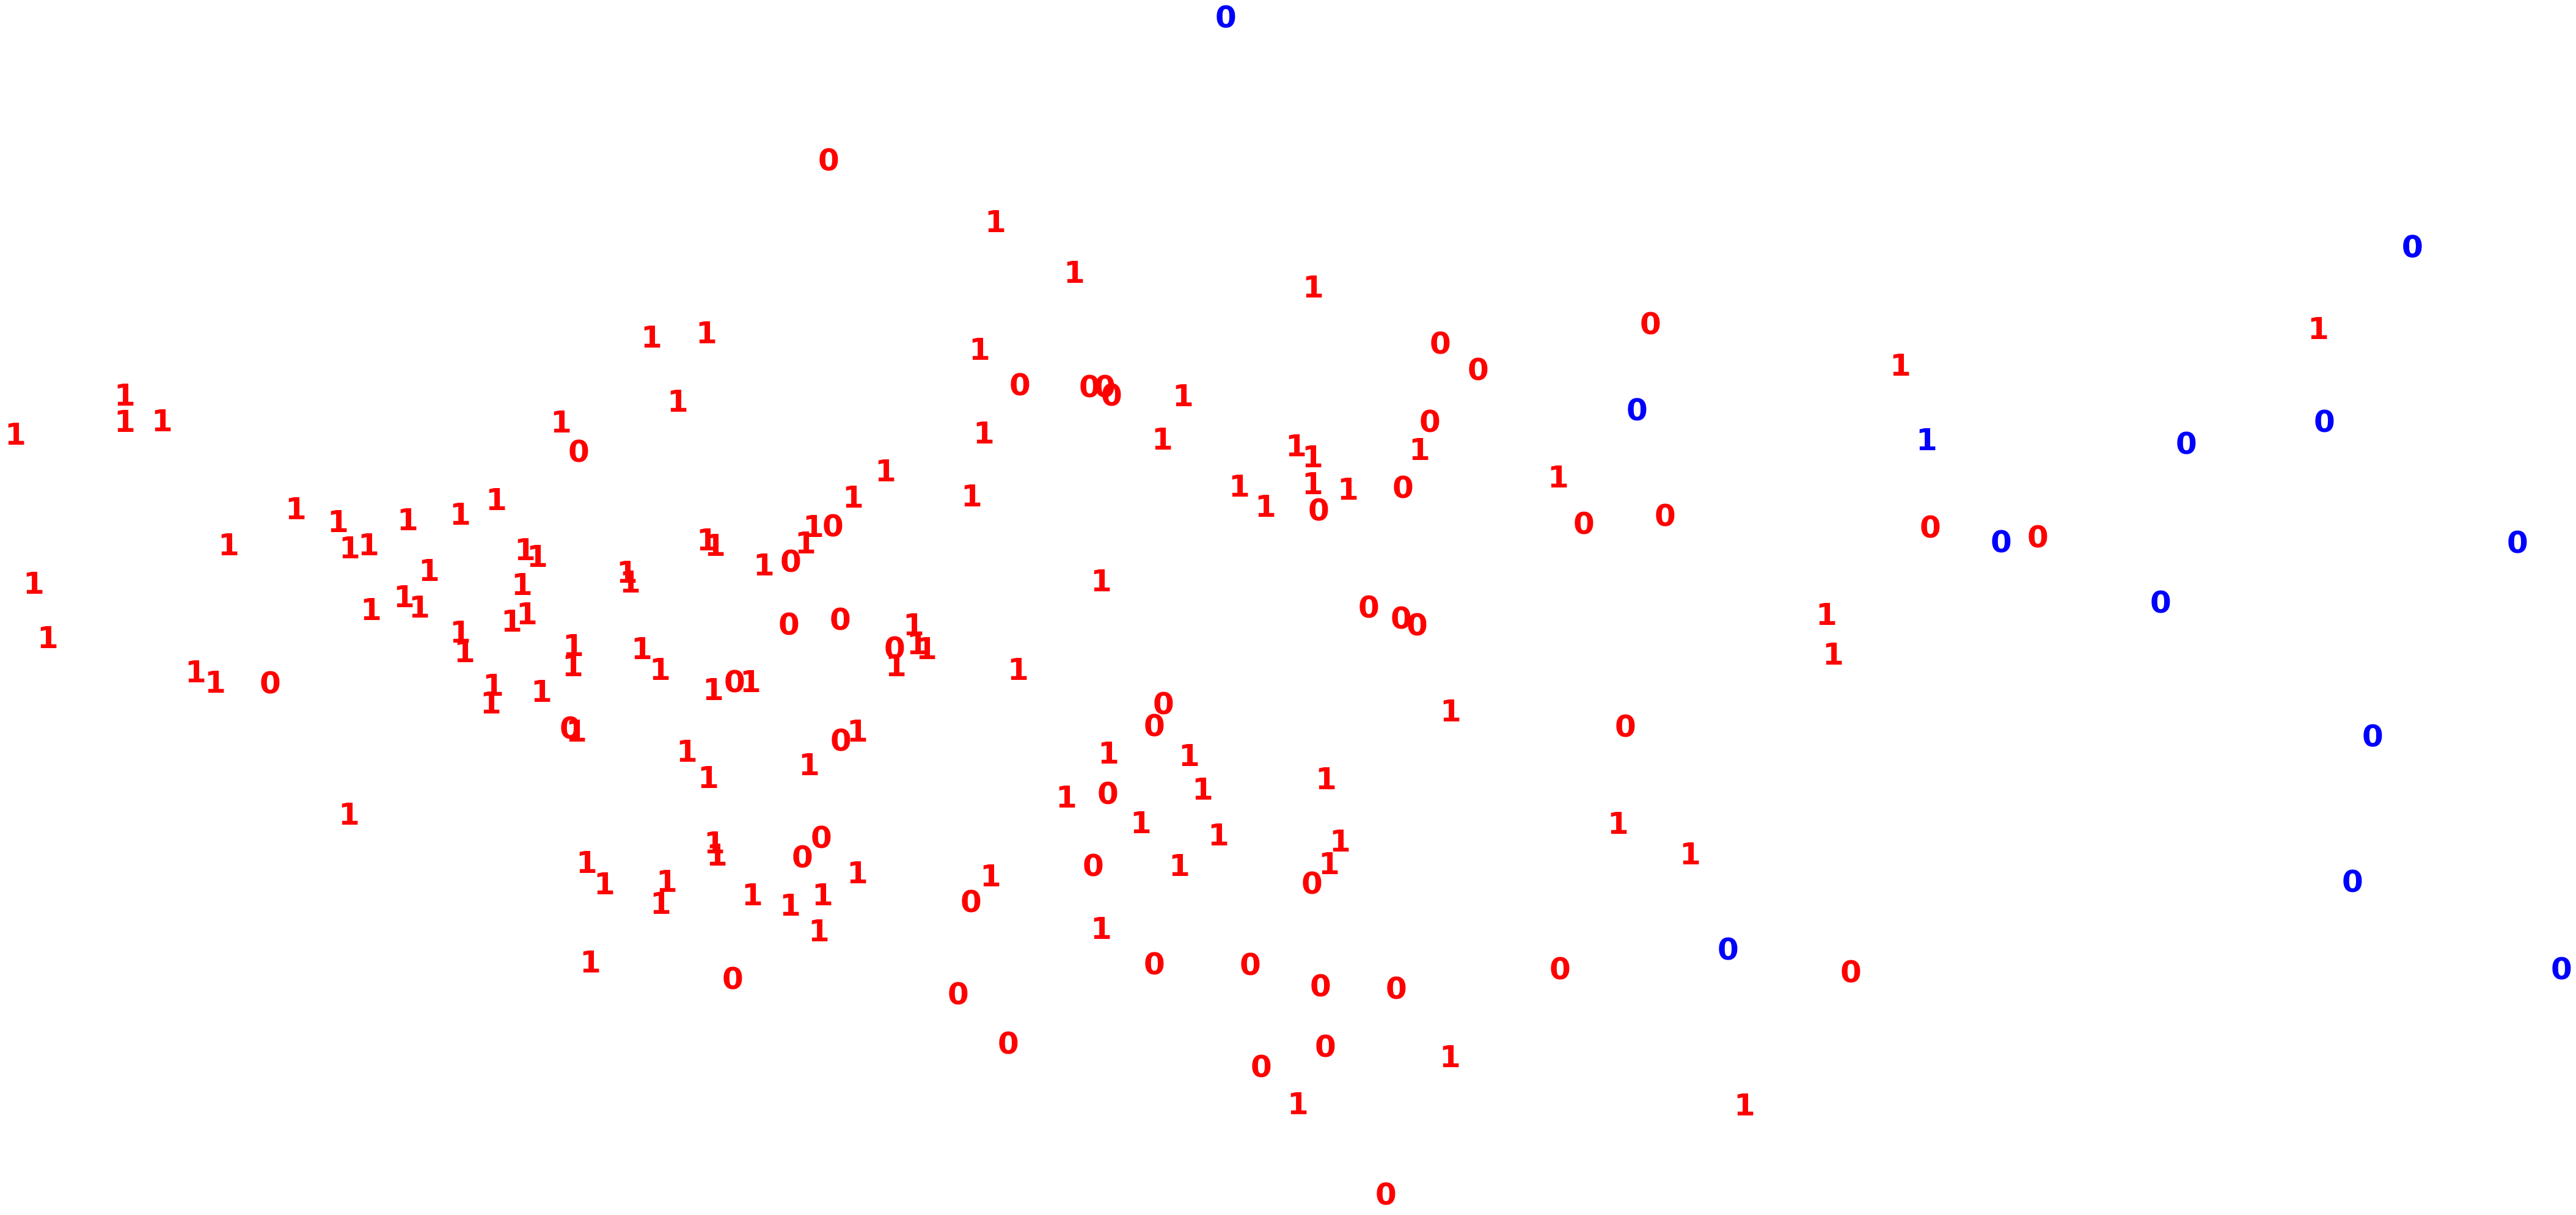

In [7]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [8]:
print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.129
GMM çözümünün siluet skoru                  : 0.115


In [9]:
pd.crosstab(y,clusters)

col_0,0,1
num,,
0,49,111
1,13,1


In [10]:
#covariance_type='tied' için

gmm_cluster = GaussianMixture(n_components=2,covariance_type='tied', random_state=123)

In [11]:
clusters = gmm_cluster.fit_predict(X_std)

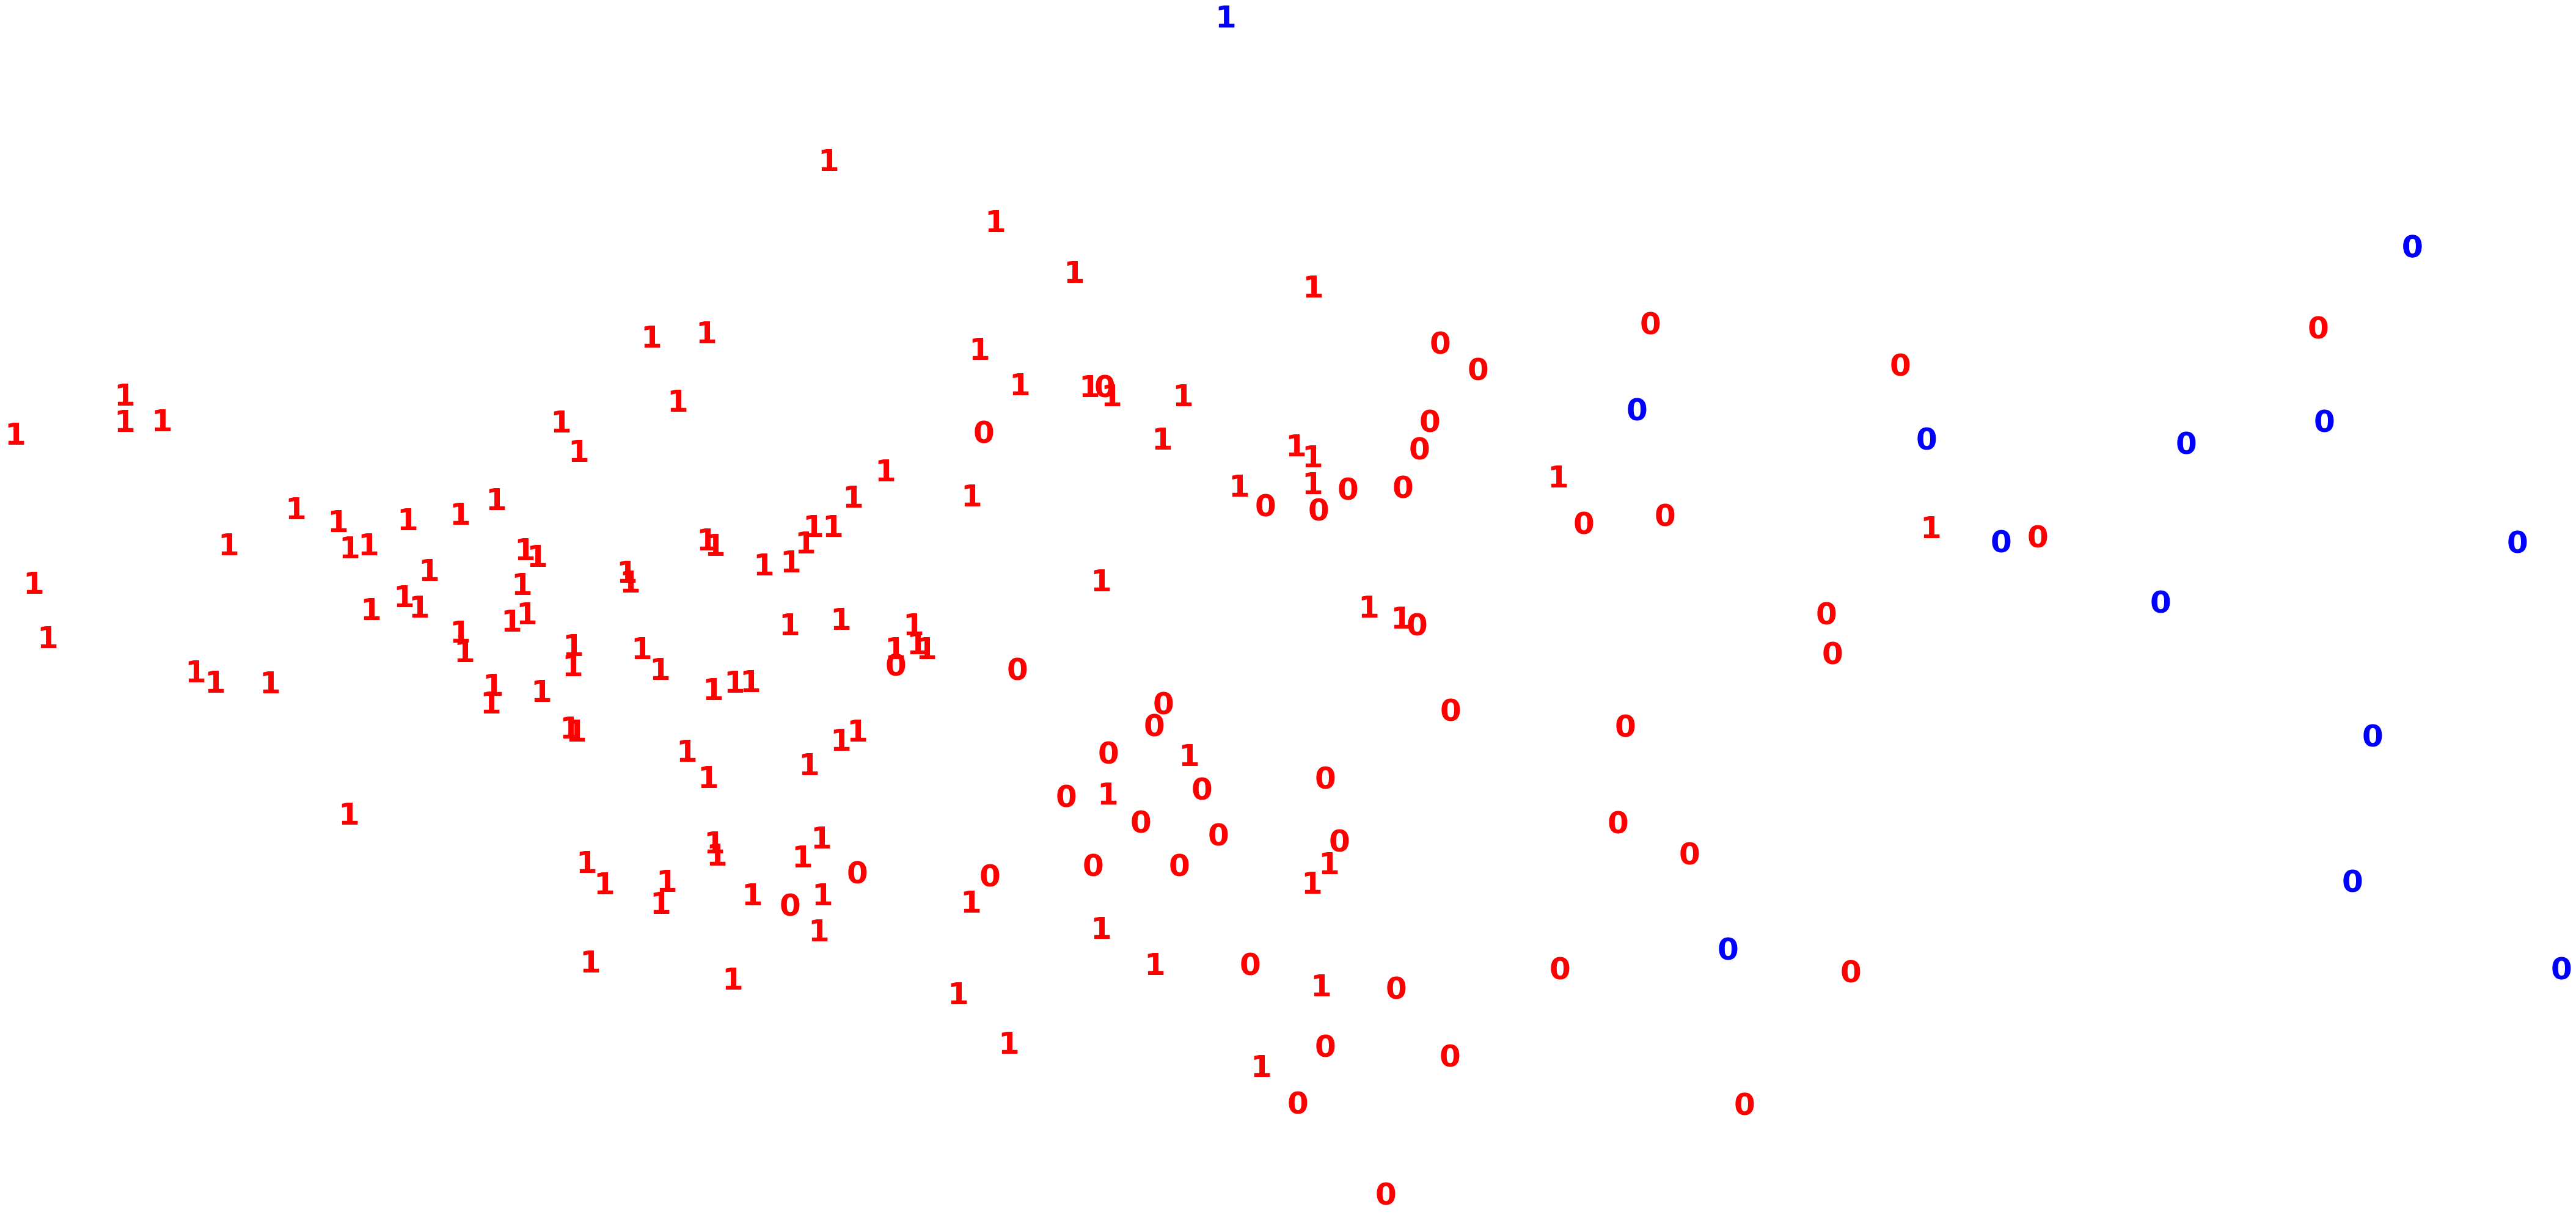

In [12]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [13]:
print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.135
GMM çözümünün siluet skoru                  : 0.145


In [14]:
#covariance_type='diag' için

gmm_cluster = GaussianMixture(n_components=2,covariance_type='diag', random_state=123)

In [15]:
clusters = gmm_cluster.fit_predict(X_std)

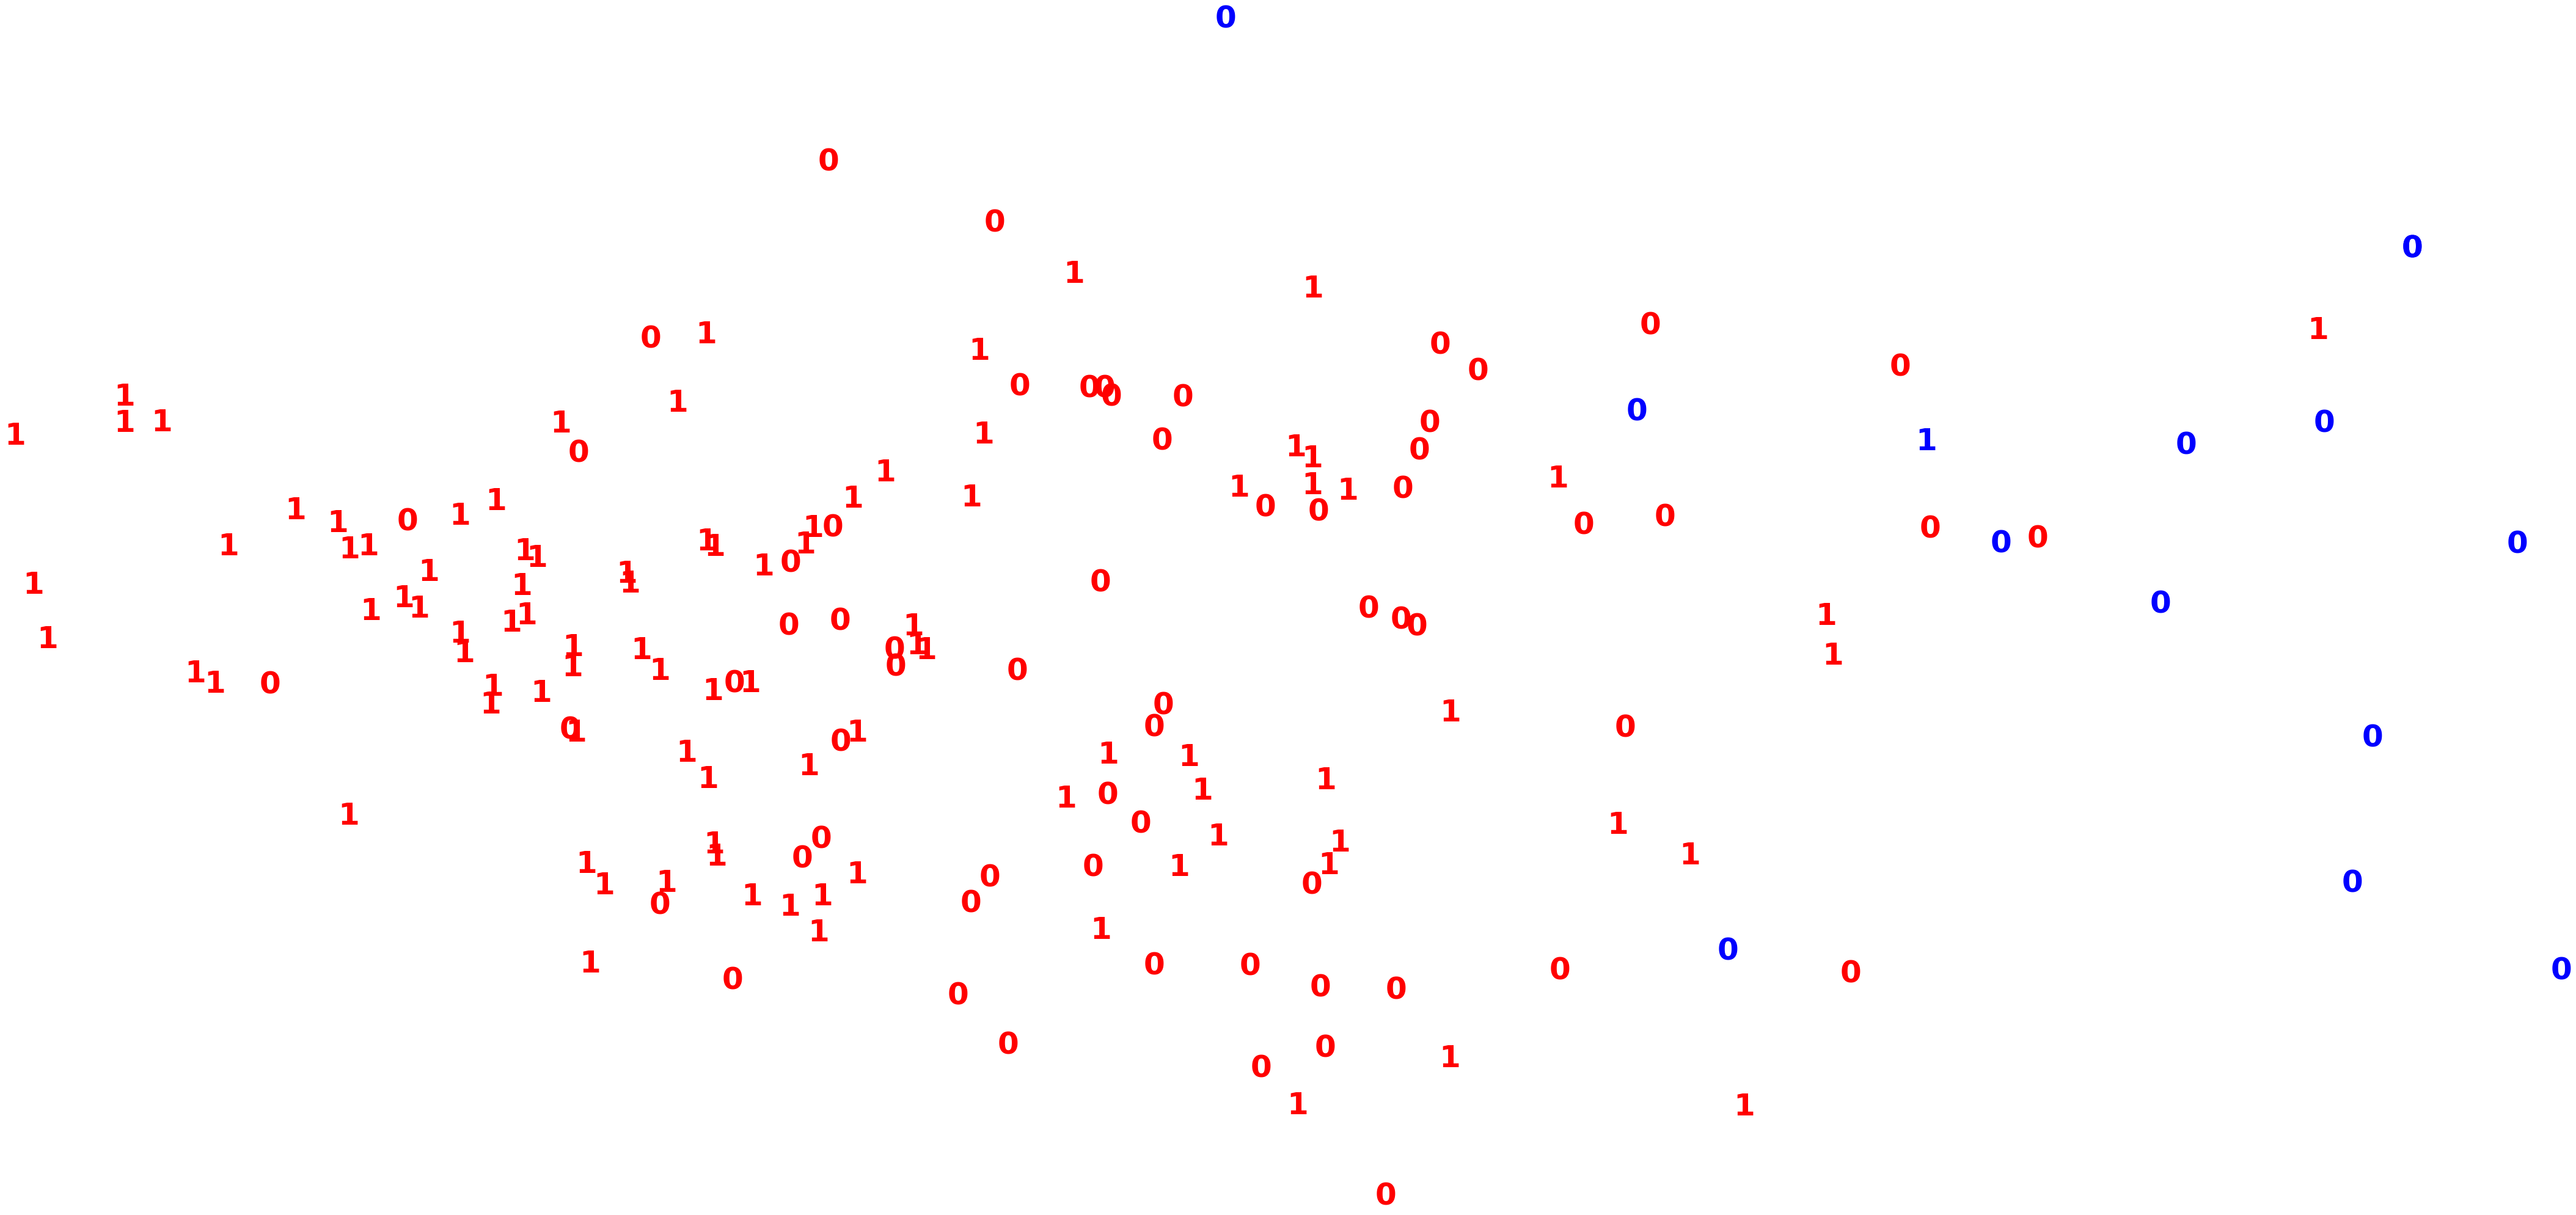

In [16]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [17]:
print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.058
GMM çözümünün siluet skoru                  : 0.104


In [18]:
# covariance_type='spherical'için

gmm_cluster = GaussianMixture(n_components=2,covariance_type='spherical', random_state=123)

In [19]:
clusters = gmm_cluster.fit_predict(X_std)

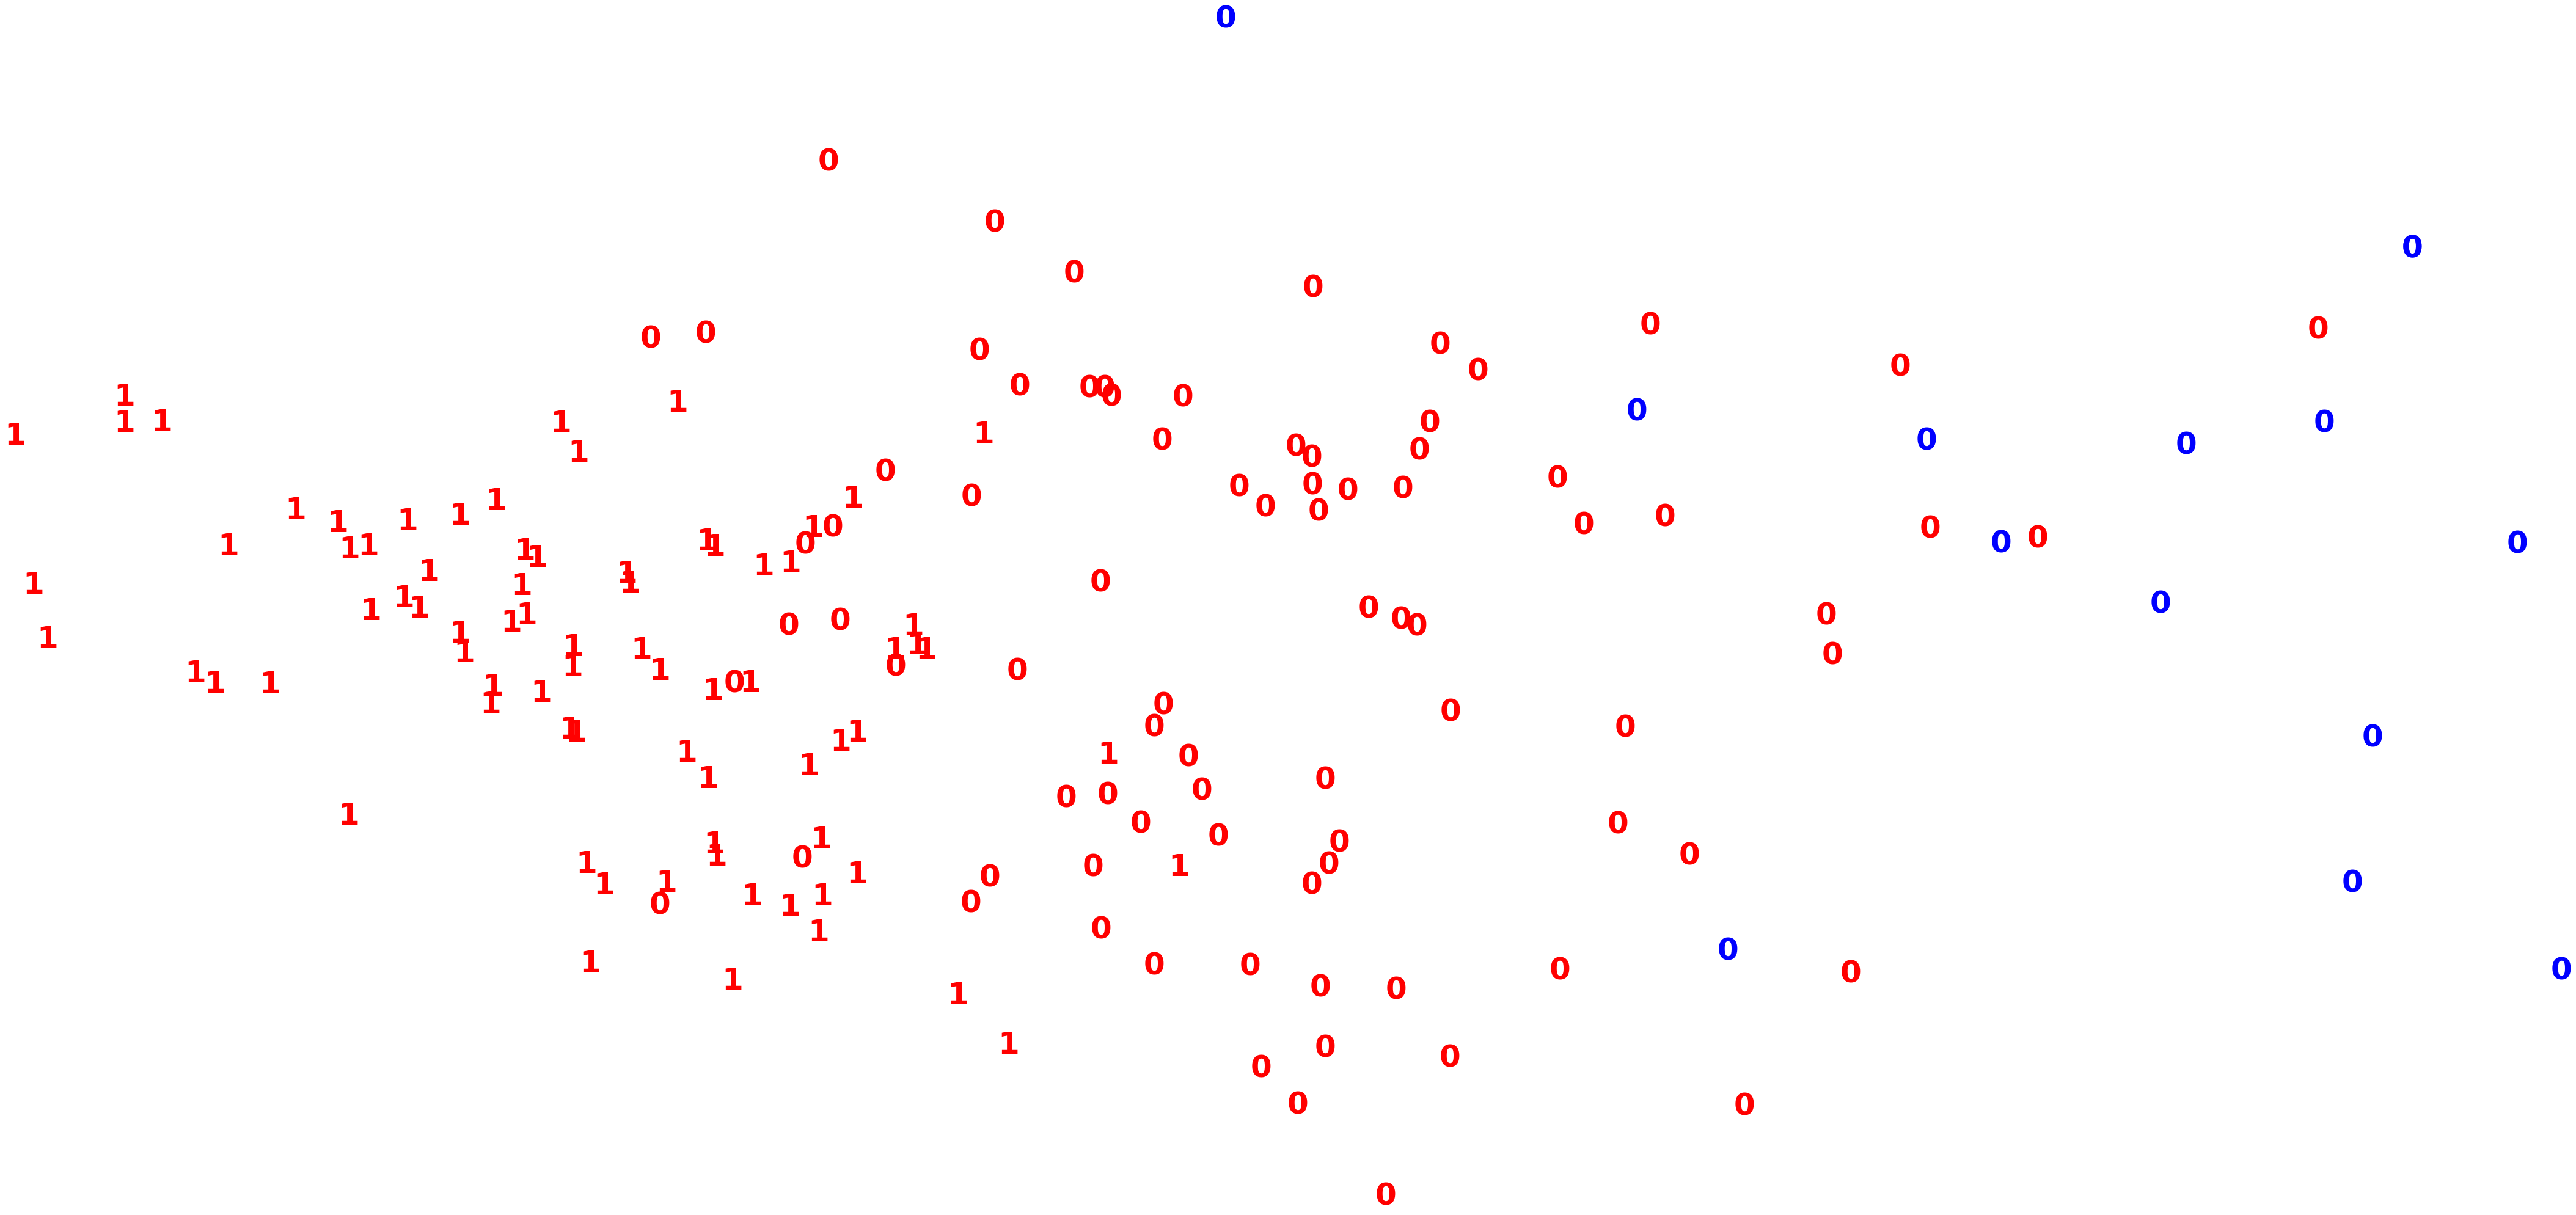

In [20]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [21]:
print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): -0.006
GMM çözümünün siluet skoru                  : 0.112
